In [35]:
import pandas as pd
df = pd.read_csv('census.csv')

In [36]:
import numpy as np
# df[df['income'] == '>50K']
# df['income'].unique()
df['income'] = np.where(df['income'] == ' >50K', 1, 0)

In [37]:
X_census = df.iloc[:,:-1]

In [38]:
X_census

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [39]:
y_census = df.iloc[:,-1].values
y_census

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
cat_vars = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
one_hot_encoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), cat_vars)], remainder='passthrough')

In [41]:
X_census= one_hot_encoder.fit_transform(X_census).toarray()

In [42]:
print(X_census.shape)

(32561, 108)


In [43]:
from sklearn.model_selection import train_test_split
X_census_train, X_census_test, y_census_train, y_census_test= train_test_split(X_census, y_census, test_size = 0.20,random_state = 0)


In [44]:
import pickle
with open('census.pkl', mode = 'wb') as f:
  pickle.dump([X_census_train, y_census_train, X_census_test, y_census_test], f)

In [45]:
from sklearn.naive_bayes import GaussianNB
naive_processor = GaussianNB()
naive_processor.fit(X_census_train, y_census_train)

GaussianNB()

In [46]:
y_predict = naive_processor.predict(X_census_test)

In [47]:
naive_processor.classes_

array([0, 1])

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_census_test, y_predict)


0.7936434822662367

In [50]:
confusion_matrix(y_true=y_census_test, y_pred= y_predict)

array([[4675,  243],
       [1101,  494]], dtype=int64)

0.7936434822662367

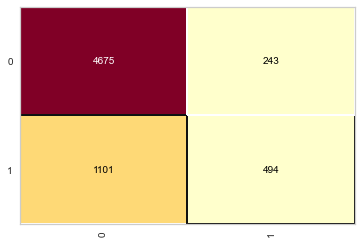

In [54]:
from yellowbrick.classifier import ConfusionMatrix
cm  = ConfusionMatrix(naive_processor)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)



In [55]:
from sklearn.metrics import classification_report


print(classification_report(y_census_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4918
           1       0.67      0.31      0.42      1595

    accuracy                           0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.79      0.76      6513

